## 1 - Amostragem

In [1]:
# importando as bibliotecas
import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import statistics
import random

In [2]:
# import da base de dados de censo americano
df = pd.read_csv('bases/census.csv')

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1.1 - Amostragem Aleatória Simples

In [5]:
# selecionando aleatoriamente 100 registros diferentes
df_amostra_aleatoria_simples = df.sample(n = 100)
df_amostra_aleatoria_simples.shape

(100, 15)

In [6]:
df_amostra_aleatoria_simples.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
29721,18,Private,152246,Some-college,10,Never-married,Other-service,Own-child,Asian-Pac-Islander,Male,0,0,16,United-States,<=50K
20602,42,Private,227397,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
1431,59,Private,296253,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
21365,30,Private,78530,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
18113,44,Private,344920,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,1617,20,United-States,<=50K


### 1.2 - Amostragem Sistemática

In [7]:
# queremos amostra de 100 pessoas
# então, selecionaremos as pessoas de 325 e 325 pessoas
df.shape[0] // 100

325

In [8]:
# função de geração da amostragem sistemática
def amostragem_sistematica(dataset, amostras):
    intervalo = dataset.shape[0] // amostras
    random.seed(1)
    # seleção do número aleatório inicial entre 0 e 325
    inicio = random.randint(0, intervalo)
    indices = np.arange(inicio, len(dataset), step = intervalo)
    amostra_sistematica = dataset.iloc[indices]
    return amostra_sistematica

In [9]:
# aplicação da função
df_amostragem_sistematica = amostragem_sistematica(df, 100)
df_amostragem_sistematica.shape

(100, 15)

In [10]:
df_amostragem_sistematica.head(3)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
68,49,Self-emp-inc,191681,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
393,34,State-gov,98101,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,?,>50K
718,22,Private,214399,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,15,United-States,<=50K


### 1.3 - Amostragem por Grupos

In [11]:
# função amostragem por grupos
# segmenta a base de dados em grupos com qtd de pessoas iguais e seleciona aleatoriamente um grupo
def amostragem_agrupamento(dataset, numero_grupos):
    intervalo = len(dataset) // numero_grupos

    grupos = []
    id_grupo = 0
    contagem = 0
    for _ in dataset.iterrows():
        grupos.append(id_grupo)
        contagem += 1
        if contagem > intervalo:
            contagem = 0
            id_grupo += 1
    
    dataset['grupo'] = grupos
    random.seed(2)
    grupo_selecionado = random.randint(0, numero_grupos)
    return dataset[dataset['grupo']==grupo_selecionado]

In [12]:
# aplicando a função de amostragem por grupos
df_amostra_agrupamento = amostragem_agrupamento(df, 326)
df_amostra_agrupamento.shape

(100, 16)

In [13]:
df_amostra_agrupamento.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,grupo
2800,47,Private,168283,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K,28
2801,17,Private,295488,11th,7,Never-married,Other-service,Own-child,Black,Female,0,0,25,United-States,<=50K,28
2802,35,Private,190895,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,<=50K,28
2803,33,Private,164190,Masters,14,Never-married,Prof-specialty,Own-child,White,Male,0,0,20,United-States,<=50K,28
2804,25,Private,216010,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K,28


### 1.4 - Amostragem Estratificada

In [14]:
# importar biblioteca que faz a extração estratificada
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
# quantidade de pessoas por salário: menor ou maior que 50K ano
# 75% da base recebe menos que 50k ano
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [16]:
# selecionar a variavel income para ser extratificada
def amostragem_estratificada(dataset, amostras, feature):
    percentual = amostras / dataset.shape[0] 
    split = StratifiedShuffleSplit(test_size= percentual)
    for _, y in split.split(dataset, dataset[feature]):
        df_y = df.iloc[y]
    return df_y

In [17]:
# aplicação da função
df_amostragem_estratificada = amostragem_estratificada(df, 100, 'income')
df_amostragem_estratificada.shape

(100, 16)

In [18]:
# a distribuição da renda anual segue como a da base total, conforme queríamos
df_amostragem_estratificada.income.value_counts()

 <=50K    76
 >50K     24
Name: income, dtype: int64

### 1.5 - Amostragem de Reservatório

In [19]:
# função de amostragem de reservatório
# essa tipo de amostragem é utilizado em stream de dados, em que nao se sabe o tamanho da base
# nem se sabe a caracteristica dos dados, ou seja é uma esteira de dados em que dados não pinçados
def amostragem_reservatorio(dataset, amostras):
    stream = []
    for i in range(len(dataset)):
        stream.append(i)
    
    i = 0
    tamanho = len(dataset)

    reservatorio = [0] * amostras
    for i in range(amostras):
        reservatorio[i] = stream[i]
    
    while i < tamanho:
        j = random.randrange(i + 1)
        if j < amostras:
            reservatorio[j] = stream[i]
        i += 1

    return df.iloc[reservatorio]

In [20]:
# aplicação da função de amostragem de reservatório
df_amostragem_reservatorio = amostragem_reservatorio(df, 100)
df_amostragem_reservatorio.shape

(100, 16)

In [21]:
df_amostragem_reservatorio.head(3)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,grupo
14096,53,Private,152810,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,55,United-States,>50K,140
30468,38,?,365465,Assoc-voc,11,Never-married,?,Own-child,White,Male,0,0,15,United-States,<=50K,304
3715,21,Private,344891,Some-college,10,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0,0,20,United-States,<=50K,37


### 1.6 - Comparativo das Amostragens

In [22]:
print('Média idade da base: ',round(df['age'].mean(),2))
print('Média idade da Amostragem Aleatória Simples: ',round(df_amostra_aleatoria_simples['age'].mean(),2))
print('Média idade da Amostragem Sistemática: ',round(df_amostragem_sistematica['age'].mean(),2))
print('Média idade da Amostragem por Grupos: ',round(df_amostra_agrupamento['age'].mean(),2))
print('Média idade da Amostragem Estratificada: ',round(df_amostra_aleatoria_simples['age'].mean(),2))
print('Média idade da Amostragem de Reservatório: ',round(df_amostragem_reservatorio['age'].mean(),2))

Média idade da base:  38.58
Média idade da Amostragem Aleatória Simples:  37.05
Média idade da Amostragem Sistemática:  37.57
Média idade da Amostragem por Grupos:  38.1
Média idade da Amostragem Estratificada:  37.05
Média idade da Amostragem de Reservatório:  37.88


### 1.7 - Comparativo das Amostragens base Cartão de Crédito

In [23]:
# importando a base de dados de credito
df_cd = pd.read_csv('bases/credit_data.csv')

In [24]:
df_cd['c#default_1'] = df_cd['c#default'].apply(lambda x: str(x))

In [25]:
df_cd.head(3)

,i#clientid,income,age,loan,c#default,c#default_1
0,1,66155.925095,59.017015,8106.532131,0,0
1,2,34415.153966,48.117153,6564.745018,0,0
2,3,57317.170063,63.108049,8020.953296,0,0


In [26]:
df_cd['c#default_1'].value_counts()

0    1717
1     283
Name: c#default_1, dtype: int64

In [27]:
# função de amostragem estratificada da base de credito
def amostragem_estratificada(dataset, amostras, feature):
    percentual = amostras / dataset.shape[0] 
    split = StratifiedShuffleSplit(test_size= percentual)
    for _, y in split.split(dataset, dataset[feature]):
        df_y = df_cd.iloc[y]
    return df_y

In [28]:
# função de amostragem de reservatório para base de crédito
def amostragem_reservatorio(dataset, amostras):
    stream = []
    for i in range(len(dataset)):
        stream.append(i)
    
    i = 0
    tamanho = len(dataset)

    reservatorio = [0] * amostras
    for i in range(amostras):
        reservatorio[i] = stream[i]
    
    while i < tamanho:
        j = random.randrange(i + 1)
        if j < amostras:
            reservatorio[j] = stream[i]
        i += 1

    return df_cd.iloc[reservatorio]

In [29]:
# aplicação das 5 funções de amostragens na base de crédito
# mesma qtd de amostras: 100
df_cd_amostragem_aleatoria = df_cd.sample(100)
df_cd_amostragem_sistematica = amostragem_sistematica(df_cd, 100)
df_cd_amostragem_agrupamento = amostragem_agrupamento(df_cd, 100)
df_cd_amostragem_estratificada = amostragem_estratificada(df_cd, 100, 'c#default_1')
df_cd_amostragem_reservatorio = amostragem_reservatorio(df_cd, 100)

In [30]:
print('Médias da base: ',round(df_cd['age'].mean(),2), round(df_cd['income'].mean(),2), round(df_cd['loan'].mean(),2))
print('Médias da Amostragem Aleatória Simples: ',round(df_cd_amostragem_aleatoria['age'].mean(),2), round(df_cd_amostragem_aleatoria['income'].mean(),2), round(df_cd_amostragem_aleatoria['loan'].mean(),2))
print('Médias da Amostragem Sistemática: ',round(df_cd_amostragem_sistematica['age'].mean(),2), round(df_cd_amostragem_sistematica['income'].mean(),2), round(df_cd_amostragem_sistematica['loan'].mean(),2))
print('Médias da Amostragem por Grupos: ',round(df_cd_amostragem_agrupamento['age'].mean(),2), round(df_cd_amostragem_agrupamento['income'].mean(),2), round(df_cd_amostragem_agrupamento['loan'].mean(),2))
print('Médias da Amostragem Estratificada: ',round(df_cd_amostragem_estratificada['age'].mean(),2), round(df_cd_amostragem_estratificada['income'].mean(),2), round(df_cd_amostragem_estratificada['loan'].mean(),2))
print('Médias da Amostragem de Reservatório: ',round(df_cd_amostragem_reservatorio['age'].mean(),2), round(df_cd_amostragem_reservatorio['income'].mean(),2), round(df_cd_amostragem_reservatorio['loan'].mean(),2))

Médias da base:  40.81 45331.6 4444.37
Médias da Amostragem Aleatória Simples:  39.57 45659.82 4487.56
Médias da Amostragem Sistemática:  40.48 42839.84 4742.21
Médias da Amostragem por Grupos:  42.29 49697.7 5515.71
Médias da Amostragem Estratificada:  39.7 47509.45 4642.09
Médias da Amostragem de Reservatório:  40.09 44732.22 4242.87


In [31]:
# verificar as diferenças entra as médias da base e dos tipos de amostragem
print('Diff Amostragem Aleatória Simples: ', round(abs(40.81 - 42.4),1), round(abs(45331.6 - 44838.46),1), round(abs(4444.37 - 4306.52),1))
print('Diff Amostragem Sistemática: ', round(abs(40.81 - 40.48),1), round(abs(45331.6 - 42839.84),1), round(abs(4444.37 - 4742.21),1))
print('Diff Amostragem por Grupos: ', round(abs(40.81 - 42.29),1), round(abs(45331.6 - 49697.7),1), round(abs(4444.37 - 5515.71),1))
print('Diff Amostragem Estratificada: ', round(abs(40.81 - 39.61),1), round(abs(45331.6 - 43128.94),1), round(abs(4444.37 - 4369.38),1))
print('Diff Amostragem Reservatório: ', round(abs(40.81 - 40.09),1), round(abs(45331.6 - 44732.22),1), round(abs(4444.37 - 4242.87),1))
# Em geral, os melhores resultados são da Aleatória Simples e Reservatório

Diff Amostragem Aleatória Simples:  1.6 493.1 137.8
Diff Amostragem Sistemática:  0.3 2491.8 297.8
Diff Amostragem por Grupos:  1.5 4366.1 1071.3
Diff Amostragem Estratificada:  1.2 2202.7 75.0
Diff Amostragem Reservatório:  0.7 599.4 201.5


## 2 - Naive Bayes

In [32]:
df = pd.read_csv('bases/credit_data.csv')

In [33]:
df.shape

(2000, 5)

In [34]:
# retirando os valores nulos
df.dropna(inplace=True)

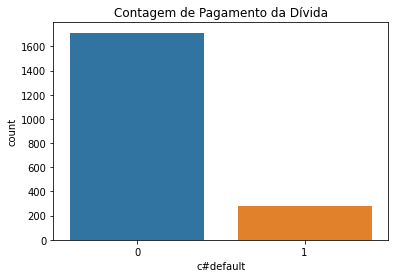

In [35]:
# plot da contagem de dados de quem pagou ou não a dívida
sns.countplot(data= df, x='c#default').set_title('Contagem de Pagamento da Dívida');

In [36]:
print(df['c#default'].value_counts())
1714/(1714+283)

0    1714
1     283
Name: c#default, dtype: int64


0.8582874311467201

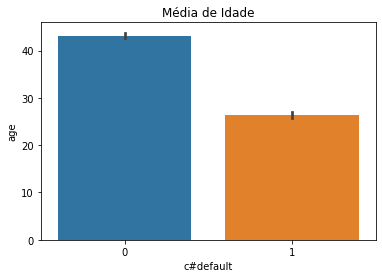

In [37]:
# plot da média de idade quem pagou ou não a dívida
# 0 a pessoa pagou a dívida e 1 o cliente é inadimplente
sns.barplot(data= df, y='age', x='c#default', estimator=np.mean).set_title('Média de Idade');

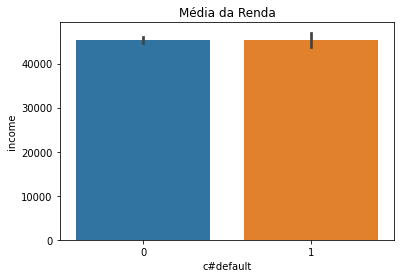

In [38]:
# plot da média de renda quem pagou ou não a dívida
# 0 a pessoa pagou a dívida e 1 o cliente é inadimplente
sns.barplot(data= df, y='income', x='c#default', estimator=np.mean).set_title('Média da Renda');

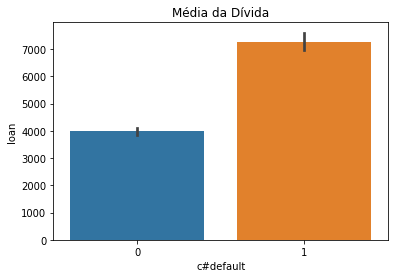

In [39]:
# plot da média da dívida quem pagou ou não a dívida
# 0 a pessoa pagou a dívida e 1 o cliente é inadimplente
sns.barplot(data= df, y='loan', x='c#default', estimator=np.mean).set_title('Média da Dívida');

In [40]:
# algumas conclusões
# 1- A variável a ser predita é desbalanceada, ou seja, 15% da base é de clientes inadimplentes;
# 2- A média de idade de clientes inadimplentes é menor, em torno de 28 anos contra 44 anos;
# 3- A média da renda é praticamente igual entre clientes que pagaram e não pagaram;
# 4- A média da dívida de quem não pagou é quase o dobro de quem pagou;

In [41]:
# importação da biblioteca de divisão da base em treino e teste
from sklearn.model_selection import train_test_split

In [42]:
# separando as variáveis previsoras e a variável target
X = df[['age','income','loan']].values
Y = df['c#default'].values

In [43]:
# divisão da base em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [44]:
# verificando se a proporção da base foi mantida de 15% e 85% na base teste
np.unique(Y_test, return_counts=True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

In [45]:
# verificando se a proporção da base foi mantida de 15% e 85% na base treinamento
np.unique(Y_train, return_counts=True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [46]:
# importação da biblioteca do algoritmo naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

In [47]:
# criação do modelo e fit
modelo = GaussianNB()
modelo.fit(X_train, Y_train)

GaussianNB()

In [48]:
# previsão do modelo
previsoes = modelo.predict(X_test)

In [49]:
# métricas do modelo
print('Acurácia do Modelo:',accuracy_score(previsoes, Y_test))
print('F1 do Modelo:',f1_score(previsoes, Y_test))


Acurácia do Modelo: 0.925
F1 do Modelo: 0.6875


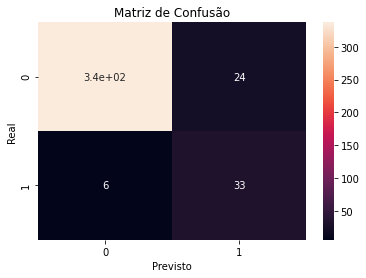

In [50]:
# matriz de confusão
cm = confusion_matrix(previsoes, Y_test)
sns.heatmap(cm, annot=True).set_xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão');

In [51]:
# percentual de acerto para pessoas que pagam o emprestimo
round(340 / (340 + 20),2)

0.94

In [52]:
# percentual de acerto para pessoas que não pagam o emprestimo
round(37 / (37 + 7),2)

0.84

In [54]:
# import das bibliotecas de sub e sobre amostragem
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

### 2.1 - Subamostragem

In [55]:
# testar subamostragem
# a função tomeklinks retira a classe com maior valores
# essa função retira da classe maioritária os registros mais semelhantes da classe minoritária
tl = TomekLinks(sampling_strategy='majority')

In [56]:
# fitando a nova base
X_under, Y_under = tl.fit_resample(X, Y)

In [57]:
# divisão da base em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X_under, Y_under, test_size=0.2, stratify=Y_under)

In [58]:
# criação do modelo e fit
modelo = GaussianNB()
modelo.fit(X_train, Y_train)

GaussianNB()

In [59]:
# previsão do modelo
previsoes = modelo.predict(X_test)

In [60]:
# métricas do modelo
print('Acurácia do Modelo:',accuracy_score(previsoes, Y_test))
print('F1 do Modelo:',f1_score(previsoes, Y_test))

Acurácia do Modelo: 0.9131578947368421
F1 do Modelo: 0.6526315789473685


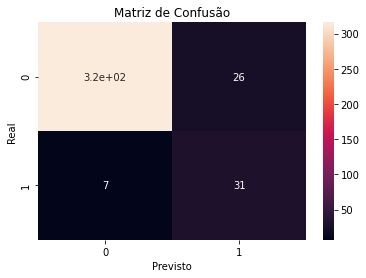

In [61]:
# matriz de confusão undersampling
cm = confusion_matrix(previsoes, Y_test)
sns.heatmap(cm, annot=True).set_xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão');

In [62]:
# percentual de acerto para pessoas que pagam o emprestimo com subamostragem
round(320 / (320 + 15),2)

0.96

In [63]:
# percentual de acerto para pessoas que não pagam o emprestimo com subamostragem
round(42 / (42 + 5),2)

0.89

### 2.2 - Sobreamostragem

In [64]:
# testar sobreamostragem
# a função SMOTE incrementa a classe com menor valores
# essa função inclui da classe minoritária os registros mais destoantes da classe majoritária
smote = SMOTE(sampling_strategy='minority')

In [65]:
# fitando a nova base
X_over, Y_over = smote.fit_resample(X, Y)

In [66]:
# divisão da base em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X_over, Y_over, test_size=0.2, stratify=Y_over)

In [67]:
# criação do modelo e fit
modelo = GaussianNB()
modelo.fit(X_train, Y_train)

GaussianNB()

In [68]:
# previsão do modelo oversampling
previsoes = modelo.predict(X_test)

In [69]:
# métricas do modelo
print('Acurácia do Modelo:',accuracy_score(previsoes, Y_test))
print('F1 do Modelo:',f1_score(previsoes, Y_test))

Acurácia do Modelo: 0.9067055393586005
F1 do Modelo: 0.9116022099447514


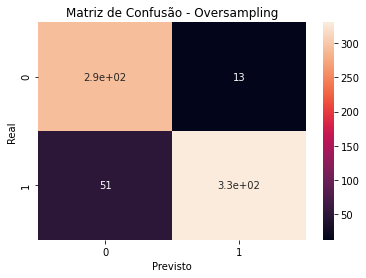

In [70]:
# matriz de confusão undersampling
cm = confusion_matrix(previsoes, Y_test)
sns.heatmap(cm, annot=True).set_xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Oversampling');

In [71]:
# percentual de acerto para pessoas que pagam o emprestimo com sobreamostragem
round(310 / (310 + 11),2)

0.97

In [72]:
# percentual de acerto para pessoas que não pagam o emprestimo com sobreamostragem
round(330 / (330 + 37),2)

0.9

### **Conclusões:**
#### 1 - As técnicas de sub e sobreamostragem melhoram a performance do modelo.
#### 2 - A técnica de sobreamostragem melhora o algoritmo, pois o interesse é ter maior performance nos casos que são inadimplentes.

## 3 - Regras de Associação

In [73]:
# import da base de dados do censo
census = pd.read_csv('bases/census.csv')

In [74]:
census.head(3)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [75]:
# criando coluna da idade por faixa
census['age_range'] = census['age'].apply(lambda x: '0-20' if x in range(0,21) else
                                                     '21-30' if x in range(20,31) else
                                                     '31-40' if x in range(30,41) else
                                                     '41-50' if x in range(40,51) else
                                                     '51-60' if x in range(50,61) else
                                                     '61-70' if x in range(60,71) else
                                                     '>70') 

In [76]:
# criando uma base de dados com as colunas com o formato string
census_apriori = census[['age_range','workclass','education','marital-status',
                         'occupation','relationship','race','sex','native-country','income']]

In [77]:
# criando lista de similaridades 
transacoes = []
for i in range(census_apriori.shape[0]):
    transacoes.append([str(census_apriori.values[i, j]) for j in range(census_apriori.shape[1])])

In [78]:
# exemplo do formato que a lista transacoes ao final
transacoes[:1]

[['31-40',
  ' State-gov',
  ' Bachelors',
  ' Never-married',
  ' Adm-clerical',
  ' Not-in-family',
  ' White',
  ' Male',
  ' United-States',
  ' <=50K']]

In [79]:
# import do algoritmo apriori
from apyori import apriori

In [80]:
#
regras = apriori(transacoes, min_support=0.3, min_confidence=0.2)
resultado = list(regras)

In [81]:
# support -> representa a porcentagem de transações da base de dados que contêm os itens de x e y
# lift ->
# confidence -> representa dentre as transações que possuem os itens de x, a porcentagem de transações que possuem também os itens de y
df_resultado = pd.DataFrame(resultado)

In [93]:
# criando colunas
df_resultado['items_list'] = df_resultado['items'].apply(lambda x: list(x))
df_resultado['num_items'] = df_resultado['items'].apply(lambda x: len(x))

In [100]:
# resultados de maior support
df_resultado.loc[(df_resultado['num_items']>1)].sort_values(ascending=False, by='support').head(5)

,items,support,ordered_statistics,items_list,num_items
27,"( United-States, White)",0.786862,"[((), ( United-States, White), 0.786861582875...","[ United-States, White]",2
13,"( United-States, <=50K)",0.675624,"[((), ( United-States, <=50K), 0.675624213015...","[ United-States, <=50K]",2
14,"( White, <=50K)",0.635699,"[((), ( White, <=50K), 0.6356991492890267, 1....","[ White, <=50K]",2
25,"( United-States, Private)",0.618378,"[((), ( United-States, Private), 0.6183778139...","[ United-States, Private]",2
21,"( United-States, Male)",0.598507,"[((), ( United-States, Male), 0.5985074168483...","[ United-States, Male]",2


### 4 - Distribuições de Probabilidades

#### 4.1 - Distribuição Normal